# CS584 HW2
Jason Yeoh • jyeoh1

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy import stats
from numpy import linalg as LA
from sklearn.neighbors import NearestNeighbors as kNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy.linalg as linalg
import sklearn.cluster as cluster
import sklearn.neighbors as neighbors
import math

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
cars = pd.read_csv('cars.csv')
groceries = pd.read_csv('Groceries.csv')
four_circle = pd.read_csv('FourCircle.csv')

## Question 1

Frequency of Number of Items Purchase
1     2159
2     1643
3     1299
4     1005
5      855
6      645
7      545
8      438
9      350
10     246
11     182
12     117
13      78
14      77
15      55
16      46
17      29
18      14
19      14
20       9
21      11
22       4
23       6
24       1
26       1
27       1
28       1
29       3
32       1
dtype: int64
25th Percentile: 2.00
50th Percentile: 3.00
75th Percentile: 6.00


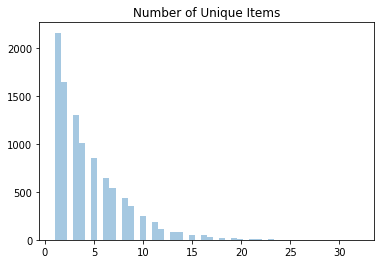

In [3]:
# (1A)

# Calculate the frequency table of number of items purchase
nItemPurchase = groceries.groupby('Customer').size().sort_values()
freqTable = pd.Series.sort_index(pd.Series.value_counts(nItemPurchase))
print('Frequency of Number of Items Purchase')
print(freqTable)

sns.distplot(nItemPurchase, kde=False, hist=True).set_title('Number of Unique Items')
print('25th Percentile: %.2f'% np.percentile(nItemPurchase, 25))
print('50th Percentile: %.2f'% np.percentile(nItemPurchase, 50))
print('75th Percentile: %.2f'% np.percentile(nItemPurchase, 75))

In [4]:
#(1B)
ListItem = groceries.groupby(['Customer'])['Item'].apply(list).values.tolist()
numList = len(ListItem)

# Convert the Item List format to the Item Indicator format
te = TransactionEncoder()
te_ary = te.fit(ListItem).transform(ListItem)
ItemIndicator = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(ItemIndicator, min_support = 75/numList, use_colnames = True)
frequent_itemsets

,support,itemsets
0,0.008033,(Instant food products)
1,0.033452,(UHT-milk)
2,0.017692,(baking powder)
3,0.052466,(beef)
4,0.033249,(berries)
...,...,...
519,0.007931,"(tropical fruit, whipped/sour cream, whole milk)"
520,0.015150,"(tropical fruit, yogurt, whole milk)"
521,0.010880,"(yogurt, whipped/sour cream, whole milk)"
522,0.007829,"(yogurt, other vegetables, root vegetables, wh..."


In [5]:
frequent_itemsets['k_itemset'] = frequent_itemsets.apply(lambda x: len(x['itemsets']), axis=1)

In [6]:
frequent_itemsets.sort_values('k_itemset')

,support,itemsets,k_itemset
0,0.008033,(Instant food products),1
74,0.019217,(red/blush wine),1
73,0.016573,(processed cheese),1
72,0.017285,(pot plants),1
71,0.057651,(pork),1
...,...,...,...
457,0.007728,"(yogurt, domestic eggs, whole milk)",3
456,0.008541,"(root vegetables, domestic eggs, whole milk)",3
465,0.008338,"(other vegetables, newspapers, whole milk)",3
522,0.007829,"(yogurt, other vegetables, root vegetables, wh...",4


In [7]:
#1C
assoc_rules = association_rules(frequent_itemsets, metric = "confidence", min_threshold = 0.01)
print('There are {} association rules with confidence metric'.format(len(assoc_rules)))

There are 1228 association rules with confidence metric


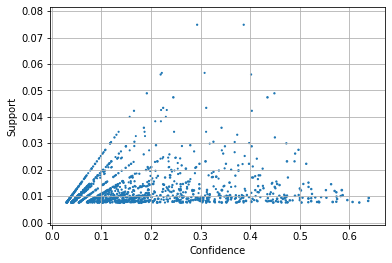

In [8]:
#1D
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.scatter(assoc_rules['confidence'], assoc_rules['support'], s = assoc_rules['lift'])
plt.grid(True)
plt.xlabel("Confidence")
plt.ylabel("Support")
plt.show()

In [10]:
#1E
assoc_rules = association_rules(frequent_itemsets, metric = "confidence", min_threshold = 0.6)
# assoc_rules[su]
assoc_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(butter, root vegetables)",(whole milk),0.012913,0.255516,0.008236,0.637795,2.496107,0.004936,2.055423
1,"(yogurt, butter)",(whole milk),0.014642,0.255516,0.009354,0.638889,2.500387,0.005613,2.061648
2,"(yogurt, root vegetables, other vegetables)",(whole milk),0.012913,0.255516,0.007829,0.606299,2.372842,0.004530,1.890989
3,"(yogurt, tropical fruit, other vegetables)",(whole milk),0.012303,0.255516,0.007626,0.619835,2.425816,0.004482,1.958317


## Question 2

In [80]:
# cars = cars.dropna(subset=['Type', 'Origin', 'DriveTrain', 'Cylinders'])
trainData = cars[['Type', 'Origin', 'DriveTrain', 'Cylinders']]
# trainData = trainData.dropna(axis='index')
trainData

,Type,Origin,DriveTrain,Cylinders
0,SUV,Asia,AWD,6.0
1,Sedan,Asia,FWD,4.0
2,Sedan,Asia,FWD,4.0
3,Sedan,Asia,FWD,6.0
4,Sedan,Asia,FWD,6.0
...,...,...,...,...
423,Sedan,Europe,FWD,5.0
424,Sedan,Europe,FWD,5.0
425,Sedan,Europe,FWD,6.0
426,Wagon,Europe,FWD,4.0


In [9]:
#2A.
trainData['Type'].value_counts()

Sedan     262
SUV        60
Sports     49
Wagon      30
Truck      24
Hybrid      3
Name: Type, dtype: int64

In [10]:
#2B.
trainData['DriveTrain'].value_counts()

FWD    226
RWD    110
AWD     92
Name: DriveTrain, dtype: int64

In [93]:
trainData['Cylinders'].value_counts()

6.0     190
4.0     136
8.0      87
5.0       7
12.0      3
0.0       2
10.0      2
3.0       1
Name: Cylinders, dtype: int64

In [12]:
trainData['Origin'].value_counts()

Asia      158
USA       147
Europe    123
Name: Origin, dtype: int64

In [119]:
def compare(data1, data2, f1, f2):
    dist = 0
    
    for i, first in data1.iterrows():
        for j, second in data2.iterrows():
            if first['Type'] != second['Type']:
                dist += 1/f1 + 1/f2
            if first['Origin'] != second['Origin']:
                dist += 1/f1 + 1/f2
            if first['DriveTrain'] != second['DriveTrain']:
                dist += 1/f1 + 1/f2
            if first['Cylinders'] != second['Cylinders']:
                dist += 1/f1 + 1/f2
    return dist

compare(trainData[ trainData['Cylinders'] == 5.0], trainData[ trainData['Cylinders'] == 0.0], 7, 2)
compare(trainData[trainData['Origin']=='Asia'], trainData[trainData['Origin']=='Europe'], 158, 123)

831.5483173812232

In [81]:
trainData["Cylinders"].fillna(0.0, inplace = True) 

/Users/jasonyeoh/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [82]:
def k_modes(data, clusters):
    km = KModes(n_clusters=clusters, init='Huang', n_init=5, verbose=1)
    clusters = km.fit_predict(data)
    centroids = km.cluster_centroids_
    
    return clusters, centroids

In [83]:
# trainData = trainData.dropna(axis='index')
clusters, centroids = k_modes(trainData, 3)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 101, cost: 597.0
Run 1, iteration: 2/100, moves: 0, cost: 597.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 39, cost: 599.0
Run 2, iteration: 2/100, moves: 0, cost: 599.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 84, cost: 609.0
Run 3, iteration: 2/100, moves: 46, cost: 601.0
Run 3, iteration: 3/100, moves: 1, cost: 601.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 84, cost: 574.0
Run 4, iteration: 2/100, moves: 0, cost: 574.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 63, cost: 629.0
Run 5, iteration: 2/100, moves: 0, cost: 629.0
Best run was number 4


In [84]:
centroids

array([['SUV', 'USA', 'AWD', '6.0'],
       ['Sedan', 'Europe', 'RWD', '6.0'],
       ['Sedan', 'Asia', 'FWD', '4.0']], dtype='<U32')

In [85]:
trainData['clusters'] = clusters

/Users/jasonyeoh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [92]:
trainData[trainData['clusters'] == 2]['Origin'].value_counts()

Asia      108
USA        35
Europe     22
Name: Origin, dtype: int64

In [87]:
trainData['clusters'].value_counts()

2    165
0    145
1    118
Name: clusters, dtype: int64

## Question 3

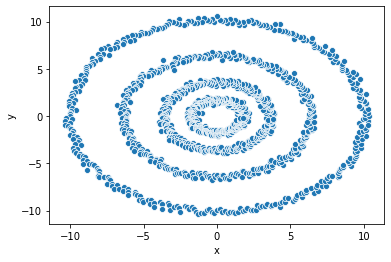

In [13]:
# 3A. Under observation, there are FOUR clusters
sns.scatterplot(x='x', y='y', data=four_circle)

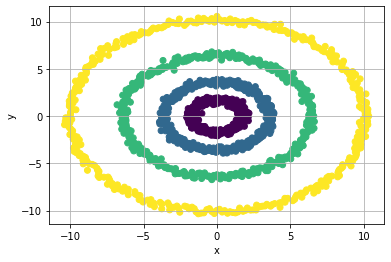

In [14]:
plt.scatter(four_circle['x'], four_circle['y'], c = four_circle['ring'])
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

Cluster Centroids = 
 [[-5.35504134  3.75858382]
 [ 2.24273217  3.22960005]
 [-2.24400726 -3.15679977]
 [ 5.28191771 -3.73631363]]


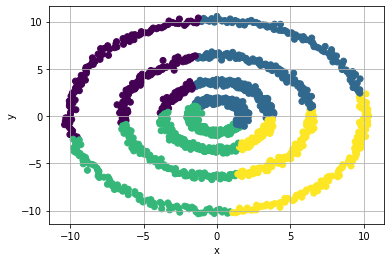

In [15]:
train = four_circle[['x','y']]
kmeans = cluster.KMeans(n_clusters=4, random_state=60616).fit(train)

print("Cluster Centroids = \n", kmeans.cluster_centers_)

four_circle['KMeanCluster'] = kmeans.labels_

plt.scatter(four_circle['x'], four_circle['y'], c = four_circle['KMeanCluster'])
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

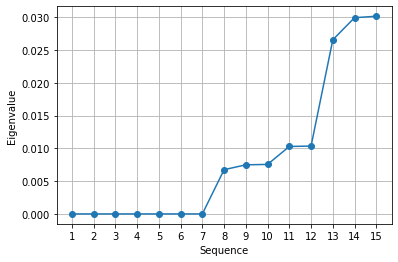

In [29]:
kNNSpec = neighbors.NearestNeighbors(n_neighbors = 10, algorithm = 'brute', metric = 'euclidean')
nbrs = kNNSpec.fit(train)
d3, i3 = nbrs.kneighbors(train)

# Retrieve the distances among the observations
distObject = neighbors.DistanceMetric.get_metric('euclidean')
distances = distObject.pairwise(train)

nObs = train.shape[0]

# Create the Adjacency matrix
Adjacency = np.zeros((nObs, nObs))
for i in range(nObs):
    for j in i3[i]:
        Adjacency[i,j] = math.exp(- (distances[i][j])**2 )

# Make the Adjacency matrix symmetric
Adjacency = 0.5 * (Adjacency + Adjacency.transpose())

# Create the Degree matrix
Degree = np.zeros((nObs, nObs))
for i in range(nObs):
    sum = 0
    for j in range(nObs):
        sum += Adjacency[i,j]
    Degree[i,i] = sum

# Create the Laplacian matrix        
Lmatrix = Degree - Adjacency

# Obtain the eigenvalues and the eigenvectors of the Laplacian matrix
evals, evecs = linalg.eigh(Lmatrix)

# Series plot of the smallest fifteen eigenvalues to determine the number of neighbors
sequence = np.arange(1,16,1) 
plt.plot(sequence, evals[0:15,], marker = "o")
plt.xlabel('Sequence')
plt.ylabel('Eigenvalue')
plt.grid("both")
plt.xticks(sequence)
plt.show()

/Users/jasonyeoh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


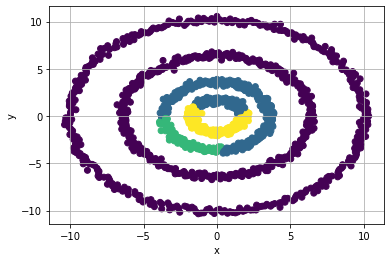

In [31]:
Z = evecs[:,[0,1]]

# plt.scatter(1e10*Z[:,0], Z[:,1])
# plt.xlabel('First Eigenvector')
# plt.ylabel('Second Eigenvector')
# plt.grid("both")
# plt.show()

# Perform 4-cluster K-mean on the first two eigenvectors
kmeans_spectral = cluster.KMeans(n_clusters = 4, random_state = 60616).fit(Z)
train['SpectralCluster'] = kmeans_spectral.labels_

plt.scatter(train['x'], train['y'], c = train['SpectralCluster'])
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

## Question 2